### quest
- 범주형/범주형, 연속형/연속형 확증 데이터 검증

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
df_titanic = pd.read_csv('../../datasets/TitanicFromDisaster_train.csv')
df_titanic[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### X 범주형 , Y 범주형 : 주로 독립성 증명
### 선정 변수 : Sex, Survived
- 분석 내용 : 성별에 따라 생존 여부가 달라지는가?
     - 귀무가설 : 성별에 따라 생존 여부가 달라지지 않는다.
     - 대립가설 : 성별에 따라 생존 여부가 달라진다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 대립가설 참, 귀무가설 기각 statistic=260, pvalue=1.1e-58,
    - 사실 결론 : 성별에 따라 생존 여부가 달라진다. P.value < 0.05 : 대립 참

In [3]:
# 데이터 변환
df_titanic[['Survived','Pclass']] = df_titanic[['Survived','Pclass']].astype(object)

In [4]:
df_titanic[['Survived', 'Sex']].describe()


,Survived,Sex
count,891,891
unique,2,2
top,0,male
freq,549,577


In [5]:
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [6]:
df_titanic_category = df_titanic[['Survived', 'Sex']]
df_titanic_category

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


In [7]:
df_titanic_category.isnull().sum()


Survived    0
Sex         0
dtype: int64

In [8]:
df_titanic_category_pivot = pd.pivot_table(data=df_titanic_category, index='Sex' , columns='Survived', aggfunc=len) # aggfunc=len -> count
df_titanic_category_pivot

Survived,0,1
Sex,,
female,81,233
male,468,109


In [9]:
stats.chi2_contingency(observed=df_titanic_category_pivot, correction=True) #data는 집계된 data로, correction는 자유도


Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))

### X: 연속형 / Y:연속형 : 주로 상관관계 확인
- correlation coefficient(상관계수)
    - 1 ~ 1
    - 0에 가까우면 관계없음, -1로 갈수록 반비례, 1로 갈수로 정비례
##### 선정 변수: age, Fare
- 분석 내용 : 나이에 따라서 비용 변화가 있는가?
    - 귀무가설 : 나이에 따라서 요금 변화가 없다.
    - 대립가설 : 나이에 따라서 요금 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 대립가설 참, 상관계수 비례관계
    - 사실 결론 : 나이에 따라서 요금이 올라간다.statistic=0.096, p-value=0.01)

In [10]:
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [11]:
df_titanic[['Age','Fare']].describe()


,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [12]:
df_age_Fare = df_titanic[['Age','Fare']]
df_age_Fare[:2]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833


In [13]:
df_age_Fare.isnull().sum()


Age     177
Fare      0
dtype: int64

In [14]:
df_age_Fare = df_age_Fare.dropna().copy()


In [15]:
df_age_Fare.isnull().sum()

Age     0
Fare    0
dtype: int64

In [16]:
df_age_Fare.corr()


,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


stats.pearsonr(df_age_Fare['Age'],df_age_Fare['Fare'] )


In [17]:
df_TOCC_error = df_TOCC[['state', 'cancellation']].dropna().copy()
df_TOCC_error.describe()

,state,cancellation
count,51279,51279
unique,4,2
top,계약확정,정상
freq,50326,50372


#### quest2
- 선정 변수 : 체중, 재발여부, ?(범주형)
- 연속형 / 범주형(정규 / 비정규 분포) 검증
- ex) 재발 여부가 정규 분포이면 비정규 분포인 범주형 변수 찾고 검증

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd

In [20]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [24]:
df_ROS_forpatient = df_ROS[['성별', '신장','심혈관질환', '체중','흡연여부','연령','직업','혈액형','재발여부']]

In [32]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


#### x : 연속형(체중) / Y:범주형(재발여부) 
- 정규/비정규 분포인지 검증 필요 
- 재발여부가 정규이면 정규를 찾아야함. 

#### 선정 변수 :  연속형(체중),범주형(재발여부) 
- 분석 내용 : 연속형(체중과) / 범주형(재발여부)에 따른 평균 차이가 있는가 ?
    - 귀무가설 : 평균에 차이 없다.
    - 가설 : 평균에 차이 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : pvalue= 0.936, 귀무가설이 참,
    - 사실 결론 : 평균에 차이가 없다. 

### 체중 단일변수 

In [38]:
df_weight = df_ROS['체중']

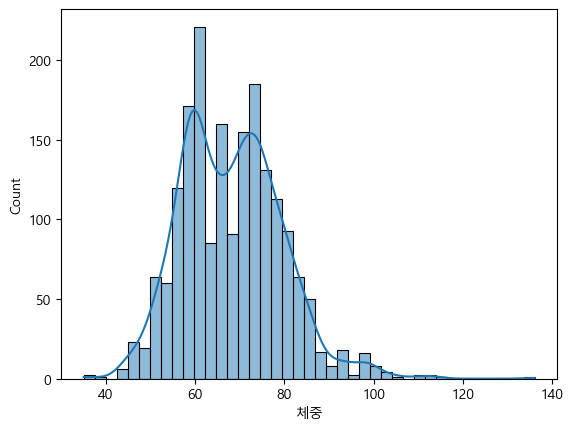

In [39]:
sns.histplot(data=df_ROS, x='체중', kde=True)
plt.show()

In [40]:
df_weight = df_ROS['체중'].dropna()

In [41]:
df_weight.count()

1894

In [43]:
#### 5천개보다 이하 : shapiro normality test

In [49]:
## s < cv : 정규분포, s > cv : 비정규분포 
# Shapiro-Wilk 정규성 검정 수행

s, p_value = stats.shapiro(df_weight)
cv = 0.78  # 임계값 (유의수준에 따라 다름)

# 검정 결과에 따라 정규성 여부 판단

if s > cv:
    result = "비정규분포"
else:
    result = "정규분포"
    

s, cv, p_value, result

## 8.3191 > 0.05 귀무가설은 거짓 
## 비정규 분포임. 

(0.9795888662338257, 0.78, 8.319101268931405e-16, '비정규분포')

### 재발여부 단일변수 

#### 선정 변수: 재발여부[:200]
- 분석 내용 : 재발여부가  정규 분포를 따르는가?
    - 귀무가설 : 재발여부가 정규 분포이다.
    - 대립가설 : 재발여부가  정규 분포가 아니다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : pvalue=0.029로 대립가설 참
    - 사실 결론 : 재발여부가 정규 분포가 아니다.

In [58]:
df_ROS_dropna =df_ROS.dropna()[:200]
df_ROS_dropna[:2]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


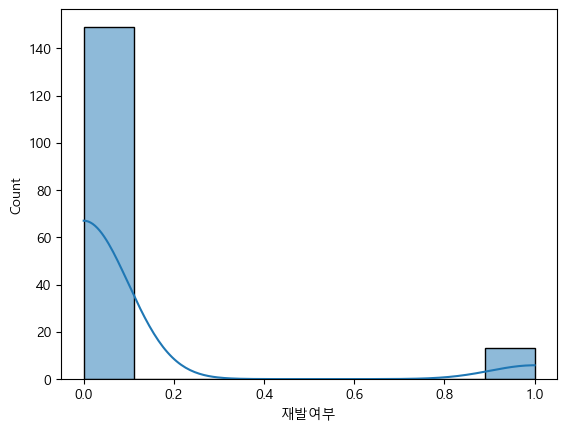

In [59]:
sns.histplot(data=df_ROS_dropna, x='재발여부', kde=True)
plt.show()

In [62]:
# '재발여부'도 비정규화임. 
stats.shapiro(df_ROS_dropna['재발여부'])

ShapiroResult(statistic=0.3008587956428528, pvalue=1.4543817315812948e-24)

#### 선정 변수:  체중, 재발여부 상관관계 확인 필요 (둘다 비정규화)

In [64]:
#### 선정 변수:  체중, 재발여부 상관관계 확인 필요 
df_ROS[['체중','재발여부']].describe()

,체중,재발여부
count,1894.000000,1894.000000
mean,68.111140,0.119852
std,11.234318,0.324874
min,35.000000,0.000000
25%,59.700000,0.000000
50%,68.000000,0.000000
75%,75.000000,0.000000
max,136.100000,1.000000


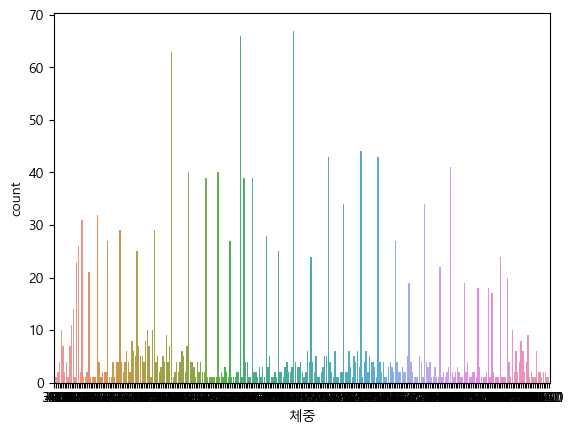

In [69]:
sns.countplot(data=df_ROS, x='체중')
plt.show()

In [71]:
df_ROS_top =df_ROS['체중'].value_counts().iloc[:5]
df_ROS_top

70.0    67
65.0    66
60.0    63
74.0    44
72.0    43
Name: 체중, dtype: int64

In [66]:
## 검증 대상 항목만 필터링 and 추출 
condition = (df_ROS['체중'] == 70.0) | (df_ROS['체중'] == 65.0) | (df_ROS['체중'] == 60.0) | (df_ROS['체중'] == 74.0) | (df_ROS['체중'] == 72.0)
df_ROS_amount = df_ROS[condition][['체중', '재발여부']]
df_ROS_amount[:5]

,체중,재발여부
55,72.0,0
105,72.0,0
257,72.0,0
366,74.0,0
368,72.0,0


In [78]:
## 하드코딩 방법 말고
condition = (df_ROS['체중'] == df_ROS_top.index[0]) |(df_ROS['체중'] == df_ROS_top.index[1])
df_ROS[condition][:2]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
603,603,604PT,34.5,2,36.0,0.0,0,0,0,0,...,0,41.6,21.3,7.4,0,-1.44,1927.5,4,Down,0
612,612,613PT,40.2,1,19.0,0.0,0,0,0,0,...,0,50.3,21.9,15.1,0,-1.91,2501.9,4,Middle,0


#### 5천 건 이하 Anderson test : 정규 분포 검증

In [80]:
statistic, cv, sl = stats.anderson(df_ROS_amount['체중'])
statistic, cv, sl # 비정규 분포이다. statistic (14.17)>cv

(14.171958293709736,
 array([0.568, 0.647, 0.776, 0.905, 1.077]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

<Axes: xlabel='체중', ylabel='Count'>

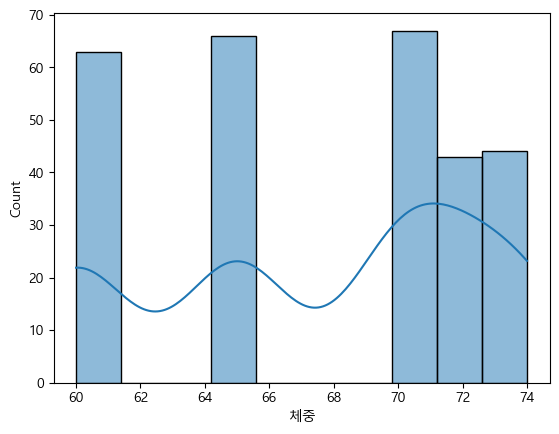

In [81]:
sns.histplot(df_ROS_amount, x='체중', kde=True)

### 체중 / 직업 검증 
##### 직업 단일변수 검증 

<Axes: xlabel='체중', ylabel='Count'>

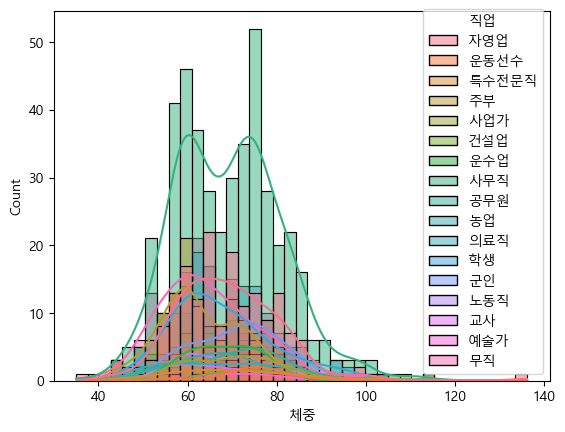

In [83]:
sns.histplot(data=df_ROS_forpatient, x='체중', kde=True, hue='직업')

In [85]:
df_job = df_ROS['직업']

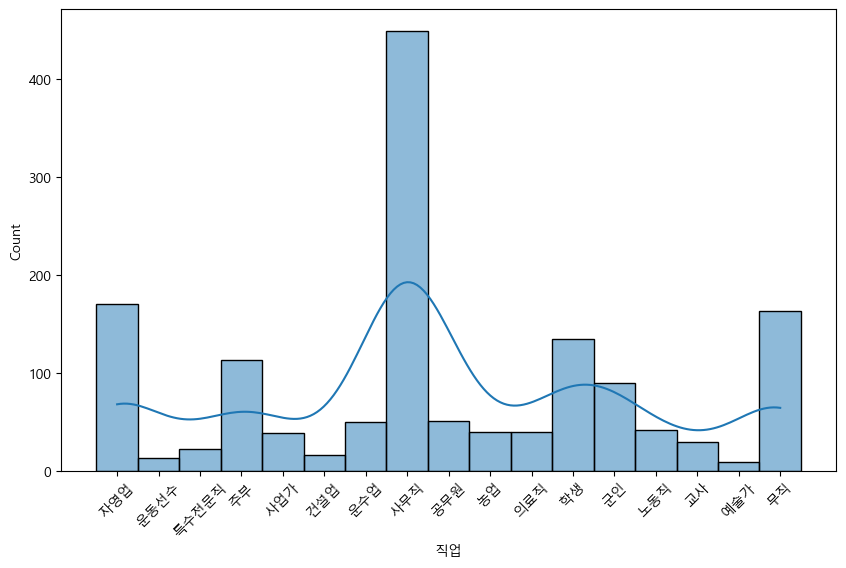

In [89]:
plt.figure(figsize=(10, 6))  # 조절할 크기로 설정
plot = sns.histplot(data=df_ROS, x='직업', kde=True)
plt.xticks(rotation=45)  # 레이블 회전 각도 조절
plt.show()

In [90]:
df_job = df_ROS['직업'].dropna()

In [91]:
df_job.count()

1479

In [92]:
#### 5천 건 이하 Anderson test : 정규 분포 검정

NameError: name 'data' is not defined